In [1]:
import networkx as nx

## Сlustering coefficient

In [42]:
G = nx.Graph()
G.add_edges_from([('A','K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'),
                 ('E', 'H'), ('F', 'G'), ('I', 'J')])

<IPython.core.display.Javascript object>


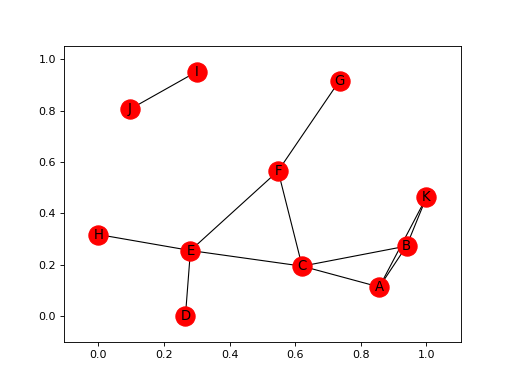

In [5]:
%matplotlib notebook
nx.draw_networkx(G)

У вершины C 4 соседа => 6 пар соседей, из них только в двух соседи соединены (E-F, B-A) => coeff = 1/3

In [8]:
nx.clustering(G, 'C')

0.3333333333333333

Чтобы посчитать кластерный коэффицент для всего графа, можно:
    - взять среднее от локальных коэффициентов
    - посчитать процент open triads, находящихся в closed triads

In [9]:
nx.average_clustering(G)

0.28787878787878785

In [10]:
nx.transitivity(G)

0.4090909090909091

## Distance measuring

In [12]:
nx.shortest_path(G, 'A', 'H')

['A', 'C', 'E', 'H']

In [13]:
nx.shortest_path_length(G, 'A', 'H')

3

Breadth-first Search (поиск в ширину) позволяет найти все пути от вершины i к другим вершинам графа.

In [17]:
Tree = nx.bfs_tree(G, 'A')
Tree.edges()

[('A', 'K'),
 ('A', 'B'),
 ('A', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'H'),
 ('F', 'G')]

In [18]:
nx.shortest_path_length(G, 'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': 3, 'H': 3, 'K': 1}

Средняя длина пути в графе.

In [66]:
G1 = nx.Graph()
G1.add_edges_from([('A','K'), ('A', 'B'), ('B', 'C'), ('B', 'K'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'),
                 ('E', 'H'), ('F', 'G'), ('E', 'I'), ('I', 'J')])

In [22]:
nx.average_shortest_path_length(G1)

2.5272727272727273

Диаметр графа - максимальная длина пути в графе.

In [24]:
nx.diameter(G1)

5

Эксцентричность вершины - максимальная длина пути из нее в другую вершину графа.

In [25]:
nx.eccentricity(G1)

{'A': 5,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

Радиус графа - минимальная эксцентричность.

In [27]:
nx.radius(G1)

3

Периферия графа - вершины с эксцентричностью равной диаметру.

In [28]:
nx.periphery(G1)

['A', 'K', 'J']

Центр графа - вершины с минимальной эксцентричностью.

In [29]:
nx.center(G1)

['C', 'E', 'F']

In [41]:
G1 = nx.convert_node_labels_to_integers(G, first_label=1) #Вершины в числа

## Connectivity (связность)

In [43]:
nx.is_connected(G) #проверка на связность

False

In [46]:
nx.number_connected_components(G) #число компонент связности

2

In [48]:
sorted(nx.connected_components(G)) #компоненты связности

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K'}, {'I', 'J'}]

In [50]:
nx.node_connected_component(G, 'A') #компонента связности, в которую входит вершина А

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K'}

Связность направленного графа.

In [55]:
G2 = nx.DiGraph()
G2.add_edge('A', 'B')

In [56]:
nx.is_strongly_connected(G2)

False

In [57]:
nx.is_weakly_connected(G2)

True

In [62]:
sorted(nx.strongly_connected_components(G2))

[{'B'}, {'A'}]

In [63]:
sorted(nx.weakly_connected_components(G2))

[{'A', 'B'}]

## Robustness (устойчивость)

In [64]:
nx.node_connectivity(G1) #минимальное количество вершин, которое надо удалить, чтобы нарушить связность графа

1

In [69]:
nx.minimum_node_cut(G1) #какие вершины надо удалить, чтобы нарушить связность графа

{'E'}

In [70]:
nx.edge_connectivity(G1) #минимальное количество рёбер, которое надо удалить, чтобы нарушить связность графа

1

In [71]:
nx.minimum_edge_cut(G1) #какие рёбра надо удалить, чтобы нарушить связность графа

{('C', 'B')}

In [78]:
sorted(nx.all_simple_paths(G, 'A', 'E')) #все способы попасть из А в К

[['A', 'B', 'C', 'E'],
 ['A', 'B', 'C', 'F', 'E'],
 ['A', 'C', 'E'],
 ['A', 'C', 'F', 'E'],
 ['A', 'K', 'B', 'C', 'E'],
 ['A', 'K', 'B', 'C', 'F', 'E']]

In [81]:
nx.node_connectivity(G1, 'A', 'E') #минимальное количество вершин, которое надо удалить, чтобы нарушить сообщение между вершинами А и К
nx.minimum_node_cut(G1, 'A', 'E') #какие вершины надо удалить, чтобы нарушить сообщение между вершинами А и К

{'C'}

In [82]:
nx.edge_connectivity(G1) #минимальное количество рёбер, которое надо удалить, чтобы нарушить  сообщение между вершинами А и К
nx.minimum_edge_cut(G1, 'A', 'E') #какие рёбра надо удалить, чтобы нарушить сообщение между вершинами А и К

{('B', 'C')}

### Модуль Pickle

In [83]:
import pickle

In [84]:
with open('data.pickle', 'wb') as f: #to write down smth to a pickle file
     pickle.dump(G, f)

In [86]:
with open('data.pickle', 'rb') as f: #to get smth from a pickle file
    gpickle = pickle.load(f)

In [87]:
gpickle